Analysis of fitness results generated by the different algorithms

In [1]:
# Load the experiment configs and data
import pickle
import json
import sys
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


with open('config.json') as cfg_file:  
     cfg = json.load(cfg_file)

pso_fitnesses = []
csfla_fitnesses = []
    
for f in cfg['data']['files']:
    pso_f_path = cfg['pso']['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
    pso_fitnesses.append(pickle.load(open(pso_f_path,"rb")))

    csfla_f_path = cfg['csfla']['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
    csfla_fitnesses.append(pickle.load(open(csfla_f_path,"rb")))

pso_df = pd.DataFrame(pso_fitnesses)
csfla_df = pd.DataFrame(csfla_fitnesses)


In [2]:
def get_ga_results(cfg):
    return pd.concat((pd.read_csv(
                    cfg['ga']['base_results_file_path'] + f + '/average_fitness.csv'
                    ) for f in cfg['data']['files'])).reset_index().drop('index',1)

In [3]:
ga_df = get_ga_results(cfg)
ga_df.head()


,wealth,return,value,realised_profit,mdd,noOfTransactions,noOfShortSellingTransactions
0,500000.612571,0.000123,0.000089,0.612571,0.000168,7,0
1,500010.203710,0.002041,0.001972,10.203710,0.000344,8,0
2,499998.296147,-0.000341,-0.000490,-1.703853,0.000748,24,0
3,499989.279088,-0.002144,-0.002676,-10.720912,0.002661,43,0
4,499996.925262,-0.000615,-0.000959,-3.074738,0.001722,75,0


Text(0,0.5,'Realised profit')

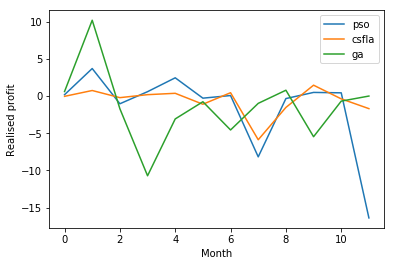

In [4]:
ax = pso_df.reset_index().plot(x='index', y='realised_profit', label="pso")
ax = csfla_df.reset_index().plot(x='index', y='realised_profit', label='csfla', ax=ax)
plt = ga_df.reset_index().plot(x='index', y='realised_profit', label='ga', ax=ax)

plt.set_xlabel("Month")
plt.set_ylabel("Realised profit")
